## Stakeholder: Real Estate Agency seeking a model to determine price of homes.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#Disabling pretty printing
%pprint

Pretty printing has been turned OFF


In [3]:
#Loading in original dataset
df_original = pd.read_csv("data/kc_house_data.csv")

### Viewing the data

In [4]:
#Checking the data
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Checking NA values
df_original.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#checking the data
df_original.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Cleaning the data

In [7]:
#Making a copy to preserve original dataframe for point of reference
from copy import deepcopy
df = deepcopy(df_original)

In [8]:
#Sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Dropping NAN values from view so we can encode the ordinal values 
df.dropna(subset=['view'], inplace = True)

### Some data is catagorical, converting using OrdinalEncoder

In [10]:
# Selecting columns to convert
ord_cat_selector = ['condition', 'grade', 'view']
cat_subset = df[ord_cat_selector]
cat_subset

,condition,grade,view
0,Average,7 Average,NONE
1,Average,7 Average,NONE
2,Average,6 Low Average,NONE
3,Very Good,7 Average,NONE
4,Average,8 Good,NONE
...,...,...,...
21592,Average,8 Good,NONE
21593,Average,8 Good,NONE
21594,Average,7 Average,NONE
21595,Average,8 Good,NONE


In [11]:
print(cat_subset['condition'].unique())
print(cat_subset['grade'].unique())
print(cat_subset['view'].unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [12]:
# Ordering the items
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
              '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [13]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list, view_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [14]:
#create dataframe of ordinal data
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition,grade,view
0,2.0,4.0,0.0
1,2.0,4.0,0.0
2,2.0,3.0,0.0
3,4.0,4.0,0.0
4,2.0,5.0,0.0
...,...,...,...
21529,2.0,5.0,0.0
21530,2.0,5.0,0.0
21531,2.0,4.0,0.0
21532,2.0,5.0,0.0


In [15]:
#input ordinal data into df
df['cond_num'] = X_subset['condition']
df['grade_num'] = X_subset['grade']
df['view_num'] = X_subset['view']

In [16]:
#Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [17]:
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       26
10.0      13
0.0        1
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [18]:
df['grade_num'] = np.where(df['grade_num'] == 0.0, 1.0, df['grade_num'])
#only 1 value was at 0.0 had to replace for future processing

In [19]:
#Sanity check
print(df['cond_num'].value_counts())
print(df['grade_num'].value_counts())
print(df['view_num'].value_counts())

2.0    13942
3.0     5639
4.0     1693
1.0      169
0.0       29
Name: cond_num, dtype: int64
4.0     8924
5.0     6041
6.0     2594
3.0     2021
7.0     1128
8.0      395
2.0      242
9.0       87
1.0       27
10.0      13
Name: grade_num, dtype: int64
0.0    19368
2.0      955
3.0      505
1.0      329
4.0      315
Name: view_num, dtype: int64


In [20]:
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['view'].value_counts())

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64
7 Average        8948
8 Good           6053
9 Better         2604
6 Low Average    2031
10 Very Good     1130
11 Excellent      397
5 Fair            242
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [21]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num           62
grade_num          62
view_num           62
dtype: int64

In [23]:
#after too much time, we couldnt discover to source of 62 NAN's appearing. so we drop them
df.dropna(subset=['view_num', 'cond_num', 'grade_num'], inplace = True)

In [24]:
#sanity check
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2359
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3818
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [25]:
#The basement datatype should be numeric, however it was an object containing "?"" values. 
df['sqft_basement'] =  df["sqft_basement"].replace("?", np.NaN)
#sanity check
df['sqft_basement'].isna().sum()

451

In [26]:
df.dropna(subset = ["sqft_basement"], inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [27]:
#sanity check
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_num,grade_num,view_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2.0,4.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,4.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2.0,3.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,4.0,4.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,6669080120,12/15/2014,405000.0,4,2.50,1980,5020,2.0,NO,NONE,...,2007,0.0,98056,47.5147,-122.190,1980,5064,2.0,5.0,0.0
21530,9211010300,7/7/2014,509900.0,3,2.50,3030,9053,2.0,NO,NONE,...,2009,0.0,98059,47.4945,-122.149,3010,6026,2.0,5.0,0.0
21531,3277800823,8/20/2014,327000.0,2,2.00,1490,1627,2.0,NO,NONE,...,2009,0.0,98126,47.5455,-122.375,1400,1498,2.0,4.0,0.0
21532,8835770330,8/19/2014,1060000.0,2,1.50,2370,184231,2.0,NO,NONE,...,2005,0.0,98045,47.4543,-121.778,3860,151081,2.0,5.0,0.0


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21021 non-null  int64         
 1   date           21021 non-null  datetime64[ns]
 2   price          21021 non-null  float64       
 3   bedrooms       21021 non-null  int64         
 4   bathrooms      21021 non-null  float64       
 5   sqft_living    21021 non-null  int64         
 6   sqft_lot       21021 non-null  int64         
 7   floors         21021 non-null  float64       
 8   waterfront     18699 non-null  object        
 9   view           21021 non-null  object        
 10  condition      21021 non-null  object        
 11  grade          21021 non-null  object        
 12  sqft_above     21021 non-null  int64         
 13  sqft_basement  21021 non-null  float64       
 14  yr_built       21021 non-null  int64         
 15  yr_renovated   1729

<AxesSubplot:>

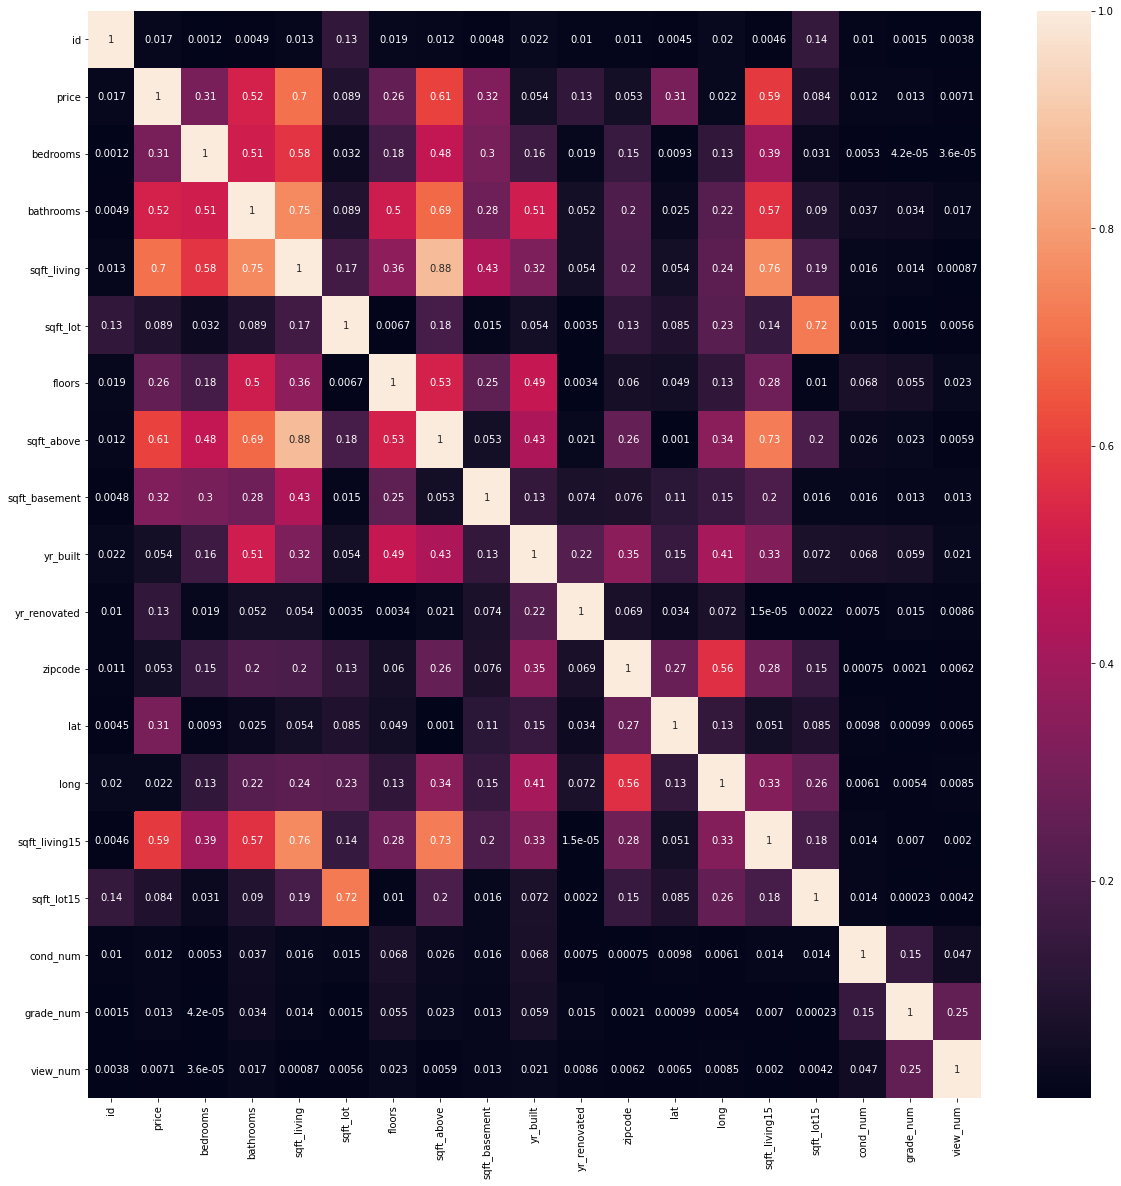

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr().abs(), annot = True)

In [31]:
#plt.figure(figsize = (20,20))
#sns.pairplot(df, corner = True)

### Prelim Findings from heatmap/correlations

Price has the highest corr with sqft living, followed by bathrooms, sqft living15, bedrooms, floors, lat

Stronng co-linearity with sqft living, sqft above, and sqft basement as sqft living = sqft above + basement. Thus above and basement are somewhat redundant. we will revist after additional columns have been removed/added and data is thoroughly cleaned

Sqft living has the highest corr with bathrooms, price, bedrooms, sqft above, basement, floor

In [32]:
# columns to make, bed/bath, sqft_avg_above/floor, binary basement or no, binary renovated or no, waterfront or no, city or town binary

In [33]:
df = df.drop(columns = ['id', 'date', 'lat', 'long', 'view', 'grade', 'condition'])
#dropping these columns, ID and Date tell us nothing. 
#lat and long are columns we do not plan to use. for neighborhood data we will use zipcode. 
#and view/grade/ condition are now redundent

In [34]:
#sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2

In [35]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2322
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3731
zipcode             0
sqft_living15       0
sqft_lot15          0
cond_num            0
grade_num           0
view_num            0
dtype: int64

In [36]:
df['bed/bath'] = df['bedrooms'] / df['bathrooms']
df['avg_fl_space'] = df['sqft_above'] / df['floors']

In [37]:
#sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21021 entries, 0 to 21533
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21021 non-null  float64
 1   bedrooms       21021 non-null  int64  
 2   bathrooms      21021 non-null  float64
 3   sqft_living    21021 non-null  int64  
 4   sqft_lot       21021 non-null  int64  
 5   floors         21021 non-null  float64
 6   waterfront     18699 non-null  object 
 7   sqft_above     21021 non-null  int64  
 8   sqft_basement  21021 non-null  float64
 9   yr_built       21021 non-null  int64  
 10  yr_renovated   17290 non-null  float64
 11  zipcode        21021 non-null  int64  
 12  sqft_living15  21021 non-null  int64  
 13  sqft_lot15     21021 non-null  int64  
 14  cond_num       21021 non-null  float64
 15  grade_num      21021 non-null  float64
 16  view_num       21021 non-null  float64
 17  bed/bath       21021 non-null  float64
 18  avg_fl

In [38]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1948.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:38   Log-Likelihood:            -2.8997e+05
No. Observations:               21021   AIC:                         5.800e+05
Df Residuals:                   21005   BIC:                         5.801e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.84e+06   3.41e+06     -2.301      0.021   -1.45e+07   -1.16e+06
bedrooms      -1.356e+05   3903.452    -34.728      0.000   -1.43e+05   -1.28e+05
bathrooms      1.914e+05   6848.044     27.943      0.000    1.78e+05    2.05e+05
sqft_living     141.7977      3.236     43.815      0.000     135.454     148.141
sqft_lot         -0.0237      0.057     -0.414      0.679      -0.136       0.089
floors         1.249e+05   8391.467     14.881      0.000    1.08e+05    1.41e+05
sqft_above       35.9587      4.530      7.938      0.000      27.080      44.838
sqft_basement   105.8389      3.518     30.085      0.000      98.943     112.734
yr_built      -3479.0973     75.148    -46.297      0.000   -3626.393   -3331.802
zipcode         144.1686     34.296      4.204      0.000      76.946     211.391
sqft_living15   105.0662      3.837     27.382      0.000      97.545     112.587
sqft_lot15       -0.6713      0.088     -7.666      0.000      -0.843      -0.500
cond_num      -3260.6439   2556.368     -1.275      0.202   -8271.322    1750.034
grade_num      2623.8912   1464.916      1.791      0.073    -247.456    5495.238
view_num       1934.4735   2215.605      0.873      0.383   -2408.284    6277.231
bed/bath       1.366e+05   6205.943     22.011      0.000    1.24e+05    1.49e+05
avg_fl_space    104.8546     10.516      9.971      0.000      84.242     125.467
==============================================================================
Omnibus:                    14256.444   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           594535.416
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      28.475   Cond. No.                     1.21e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
df.dropna(subset = ['waterfront'], inplace = True)
df['water_bool'] = df['waterfront'].str.replace("NO", "0")
df['water_bool'] = df['water_bool'].str.replace("YES", "1")
df['water_bool'] = df['water_bool'].astype(int)

In [40]:
X = df.drop(columns=['price','waterfront', 'yr_renovated'])
y = df['price']
#repeating the model with waterfront as a boolean included.
model_2 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1838.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:39   Log-Likelihood:            -2.5749e+05
No. Observations:               18699   AIC:                         5.150e+05
Df Residuals:                   18682   BIC:                         5.152e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.69e+06   3.53e+06     -1.611      0.107   -1.26e+07    1.23e+06
bedrooms      -1.258e+05   4057.239    -30.999      0.000   -1.34e+05   -1.18e+05
bathrooms      1.818e+05   7098.808     25.612      0.000    1.68e+05    1.96e+05
sqft_living     140.7294      3.342     42.116      0.000     134.180     147.279
sqft_lot         -0.0167      0.060     -0.280      0.779      -0.134       0.100
floors         1.169e+05   8690.628     13.447      0.000    9.98e+04    1.34e+05
sqft_above       42.1512      4.685      8.997      0.000      32.969      51.334
sqft_basement    98.5867      3.642     27.067      0.000      91.448     105.726
yr_built      -3363.8361     77.854    -43.207      0.000   -3516.437   -3211.235
zipcode         120.2863     35.538      3.385      0.001      50.630     189.943
sqft_living15    95.9238      3.979     24.110      0.000      88.125     103.722
sqft_lot15       -0.7168      0.090     -7.984      0.000      -0.893      -0.541
cond_num      -3000.4250   2641.856     -1.136      0.256   -8178.703    2177.853
grade_num      1630.8383   1522.488      1.071      0.284   -1353.377    4615.054
view_num       2075.7012   2283.249      0.909      0.363   -2399.675    6551.077
bed/bath       1.281e+05   6445.794     19.867      0.000    1.15e+05    1.41e+05
avg_fl_space     97.3449     10.874      8.952      0.000      76.032     118.658
water_bool     7.223e+05   1.99e+04     36.290      0.000    6.83e+05    7.61e+05
==============================================================================
Omnibus:                    11714.467   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463328.268
Skew:                           2.432   Prob(JB):                         0.00
Kurtosis:                      26.896   Cond. No.                     2.16e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Viewing the P vales, we can conclude that sqft_lot as well as our derived ordinal columns have no substantial impact on our R2

In [41]:
#we dropped all the rows that have NaNs as we beleive we have enough datapoints to run ours models.
df = df.dropna()
df.isna().sum()
df.shape

(15390, 20)

In [42]:
#loading in zipcode data
zipcodes = pd.read_csv("zipcodes.csv")
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")
zipcodes['Population'] = zipcodes['Population'].astype(int)
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)
zipcodes.drop(columns = ['Unnamed: 0', 'Timezone', 'Classification', "Area Code(s)"], inplace = True)
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)
zipcodes.head()

,zipcode,City,Population
0,98001,Auburn,31911
1,98002,Auburn,31647
2,98003,Federal Way,44151
3,98004,Bellevue,27946
4,98005,Bellevue,17714


In [43]:
#updated from 9/14/22 testing
#adding a column for whether a basement exists or not
df['base_bool'] = np.where(df['sqft_basement'] > 0.0, 1.0, df['sqft_basement'])

In [44]:
#adding column for if the house has been renovated or not
df['renovate_bool'] = np.where(df['yr_renovated'] > 0.0, 1.0, df['yr_renovated'])
df['renovate_bool'] = df['renovate_bool'].astype(int)

In [45]:
x = zipcodes.groupby(by = 'City')['Population'].sum()
x

City
Auburn           103374
Baring              294
Bellevue         131324
Black Diamond      5025
Bothell           29212
Burton                0
Carnation          6765
Duvall            10725
Enumclaw          20987
Fall City          5650
Federal Way       91661
Hobart                0
Issaquah          50489
Kenmore           20419
Kent             147876
Kirkland          74745
Maple Valley      31171
Medina             2971
Mercer Island     22699
North Bend        13888
Pacific            6339
Preston             322
Ravensdale         3270
Redmond           77226
Renton           141407
Sammamish         46463
Seahurst              0
Seattle          837792
Skykomish           333
Snoqualmie        12699
Vashon            10624
Woodinville       35897
Name: Population, dtype: int32

In [46]:
zipcodes = zipcodes.merge(x, on='City', how='left')
zipcodes.rename(columns={"Population_y": "city_pop"}, inplace = True)
zipcodes

,zipcode,City,Population_x,city_pop
0,98001,Auburn,31911,103374
1,98002,Auburn,31647,103374
2,98003,Federal Way,44151,91661
3,98004,Bellevue,27946,131324
4,98005,Bellevue,17714,131324
...,...,...,...,...
115,98195,Seattle,0,837792
116,98198,Seattle,34584,837792
117,98199,Seattle,19686,837792
118,98224,Baring,294,294


In [47]:
df.bedrooms = df.bedrooms.astype(int)
df.cond_num = df.cond_num.astype(int)
df.grade_num = df.grade_num.astype(int)
df.view_num = df.view_num.astype(int)
df.yr_built = df.yr_built.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.renovate_bool = df.renovate_bool.astype(int)
df.base_bool = df.base_bool.astype(int)
df.water_bool = df.water_bool.astype(int)
df.price=df.price.astype(float)
df.bedrooms=df.bedrooms.astype(float)
df.floors=df.floors.astype(float)
df['bed/bath']=df['bed/bath'].astype(float)
df.avg_fl_space=df.avg_fl_space.astype(float)
df.sqft_living=df.sqft_living.astype(float)
df.sqft_living15=df.sqft_living15.astype(float)
df.sqft_lot=df.sqft_lot.astype(float)
df.sqft_lot15=df.sqft_lot15.astype(float)
df.sqft_above=df.sqft_above.astype(float)
df.sqft_basement=df.sqft_basement.astype(float)

In [48]:
#mergeing into main dataframe
df = df.merge(zipcodes, on='zipcode', how='left')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,grade_num,view_num,bed/bath,avg_fl_space,water_bool,base_bool,renovate_bool,City,Population_x,city_pop
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,4,0,1.333333,1085.0,0,1,1,Seattle,37081,837792
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,4,0,1.333333,1050.0,0,1,0,Seattle,14770,837792
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,5,0,1.500000,1680.0,0,0,0,Sammamish,25748,46463
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,8,0,0.888889,3890.0,0,1,0,Redmond,18784,77226
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,4,0,3.000000,1050.0,0,1,0,Seattle,25922,837792


In [49]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df.drop(columns= not_included)
y = df['price']
#repeating t
model_x = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1380.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:39   Log-Likelihood:            -2.1134e+05
No. Observations:               15390   AIC:                         4.227e+05
Df Residuals:                   15369   BIC:                         4.229e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.936e+08   7.04e+06     27.515      0.000     1.8e+08    2.07e+08
bedrooms      -1.144e+05   4319.493    -26.475      0.000   -1.23e+05   -1.06e+05
bathrooms      1.645e+05   7574.806     21.720      0.000     1.5e+05    1.79e+05
sqft_living     140.3742      3.985     35.229      0.000     132.564     148.185
sqft_lot          0.0159      0.062      0.258      0.796      -0.105       0.137
floors         3.997e+04   9568.292      4.178      0.000    2.12e+04    5.87e+04
sqft_above       82.4933      5.469     15.082      0.000      71.772      93.214
sqft_basement    57.8823      5.545     10.438      0.000      47.013      68.752
yr_built      -2118.9815     93.314    -22.708      0.000   -2301.887   -1936.076
zipcode       -1936.6047     72.091    -26.863      0.000   -2077.911   -1795.298
sqft_living15   114.3371      4.306     26.550      0.000     105.896     122.778
sqft_lot15       -0.5295      0.094     -5.624      0.000      -0.714      -0.345
cond_num      -1543.2304   2813.548     -0.548      0.583   -7058.118    3971.658
grade_num      1702.3442   1620.544      1.050      0.294   -1474.114    4878.802
view_num        329.8811   2423.654      0.136      0.892   -4420.767    5080.529
bed/bath       1.218e+05   6883.096     17.689      0.000    1.08e+05    1.35e+05
avg_fl_space     53.7451     11.693      4.596      0.000      30.825      76.665
water_bool     7.583e+05   2.13e+04     35.679      0.000    7.17e+05       8e+05
base_bool      1.248e+04   6928.738      1.801      0.072   -1103.329    2.61e+04
renovate_bool  4.199e+04   9533.660      4.405      0.000    2.33e+04    6.07e+04
Population_x     -2.5193      0.169    -14.926      0.000      -2.850      -2.188
city_pop          0.3883      0.012     32.830      0.000       0.365       0.411
==============================================================================
Omnibus:                     9867.064   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449225.993
Skew:                           2.470   Prob(JB):                         0.00
Kurtosis:                      29.003   Cond. No.                     1.51e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
#creating dummies for the catagorical nominal data of cities. 
X_city = pd.get_dummies(df['City'], drop_first = True)

df_cities = pd.concat([df, X_city], axis = 1)
df_cities.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [51]:
#creating dummies for the catagorical nominal data of cities. 
X_zip = pd.get_dummies(df['zipcode'], drop_first = True)

df_zip = pd.concat([df, X_zip], axis = 1)
df_zip.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,0,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,0,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,1,0,0,0,0,0,0,0,0,0


In [52]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_cities.drop(columns= not_included)
y = df_cities['price']
#repeating the model with cities as dummies
model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     948.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:40   Log-Likelihood:            -2.0940e+05
No. Observations:               15390   AIC:                         4.189e+05
Df Residuals:                   15347   BIC:                         4.192e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.996e+08   7.92e+06     25.209      0.000    1.84e+08    2.15e+08
bedrooms      -1.016e+05   3826.684    -26.557      0.000   -1.09e+05   -9.41e+04
bathrooms      1.442e+05   6705.607     21.506      0.000    1.31e+05    1.57e+05
sqft_living     143.9772      3.520     40.902      0.000     137.077     150.877
sqft_lot          0.1847      0.055      3.369      0.001       0.077       0.292
floors         6286.6827   8490.880      0.740      0.459   -1.04e+04    2.29e+04
sqft_above      101.6467      4.860     20.914      0.000      92.120     111.173
sqft_basement    42.3613      4.923      8.605      0.000      32.712      52.011
yr_built      -1557.7737     83.475    -18.661      0.000   -1721.395   -1394.152
zipcode       -2042.5208     82.399    -24.788      0.000   -2204.033   -1881.008
sqft_living15    75.1305      3.914     19.196      0.000      67.459      82.802
sqft_lot15       -0.2105      0.085     -2.477      0.013      -0.377      -0.044
cond_num       -930.2811   2484.990     -0.374      0.708   -5801.156    3940.593
grade_num       999.7123   1431.056      0.699      0.485   -1805.327    3804.752
view_num       -714.0646   2139.721     -0.334      0.739   -4908.172    3480.043
bed/bath       1.049e+05   6092.245     17.218      0.000     9.3e+04    1.17e+05
avg_fl_space     -3.7966     10.397     -0.365      0.715     -24.177      16.583
water_bool     7.569e+05   1.91e+04     39.644      0.000    7.19e+05    7.94e+05
base_bool      6232.6505   6139.123      1.015      0.310   -5800.759    1.83e+04
renovate_bool  3.529e+04   8431.652      4.186      0.000    1.88e+04    5.18e+04
Population_x     -0.9991      0.195     -5.111      0.000      -1.382      -0.616
city_pop         31.4710      1.254     25.102      0.000      29.014      33.928
Bellevue       -5.65e+05   3.92e+04    -14.406      0.000   -6.42e+05   -4.88e+05
Black Diamond  3.069e+06   1.23e+05     25.010      0.000    2.83e+06    3.31e+06
Bothell        2.376e+06   9.25e+04     25.678      0.000    2.19e+06    2.56e+06
Carnation      3.053e+06    1.2e+05     25.381      0.000    2.82e+06    3.29e+06
Duvall         2.911e+06   1.15e+05     25.206      0.000    2.68e+06    3.14e+06
Enumclaw       2.581e+06   1.03e+05     25.073      0.000    2.38e+06    2.78e+06
Fall City      3.145e+06   1.23e+05     25.487      0.000     2.9e+06    3.39e+06
Federal Way    3.293e+05   1.76e+04     18.756      0.000    2.95e+05    3.64e+05
Issaquah       1.807e+06   6.64e+04     27.237      0.000    1.68e+06    1.94e+06
Kenmore        2.691e+06   1.04e+05     25.857      0.000    2.49e+06    2.89e+06
Kent          -1.387e+06   5.67e+04    -24.466      0.000    -1.5e+06   -1.28e+06
Kirkland       1.182e+06   3.73e+04     31.681      0.000    1.11e+06    1.26e+06
Maple Valley   2.295e+06   9.12e+04     25.150   

In [53]:
not_included = ['price','waterfront', 'yr_renovated', 'City']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with zip as dummies
model_4 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     682.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:40   Log-Likelihood:            -2.0713e+05
No. Observations:               15390   AIC:                         4.144e+05
Df Residuals:                   15303   BIC:                         4.151e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -890.2262    157.662     -5.646      0.000   -1199.262    -581.190
bedrooms      -9.168e+04   3324.203    -27.580      0.000   -9.82e+04   -8.52e+04
bathrooms      1.326e+05   5811.128     22.811      0.000    1.21e+05    1.44e+05
sqft_living     158.6266      3.077     51.553      0.000     152.595     164.658
sqft_lot          0.2529      0.047      5.338      0.000       0.160       0.346
floors        -9.105e+04   7632.908    -11.929      0.000   -1.06e+05   -7.61e+04
sqft_above      120.5667      4.258     28.317      0.000     112.221     128.912
sqft_basement    38.0599      4.273      8.907      0.000      29.684      46.436
yr_built       -340.4225     75.674     -4.499      0.000    -488.753    -192.092
zipcode           6.1416      1.488      4.127      0.000       3.225       9.059
sqft_living15    52.4839      3.456     15.186      0.000      45.710      59.258
sqft_lot15       -0.0891      0.074     -1.208      0.227      -0.234       0.055
cond_num       1263.5675   2148.712      0.588      0.557   -2948.164    5475.299
grade_num      1341.4129   1237.758      1.084      0.278   -1084.740    3767.566
view_num      -1235.2439   1850.270     -0.668      0.504   -4861.994    2391.506
bed/bath       1.061e+05   5284.616     20.082      0.000    9.58e+04    1.16e+05
avg_fl_space    -63.2795      9.158     -6.910      0.000     -81.230     -45.329
water_bool     8.376e+05   1.66e+04     50.470      0.000    8.05e+05     8.7e+05
base_bool     -3.053e+04   5369.326     -5.686      0.000   -4.11e+04      -2e+04
renovate_bool  3.687e+04   7316.714      5.040      0.000    2.25e+04    5.12e+04
Population_x     -7.5134      0.319    -23.588      0.000      -8.138      -6.889
city_pop          0.3334      0.013     24.760      0.000       0.307       0.360
98002          2.452e+04   1.76e+04      1.391      0.164      -1e+04    5.91e+04
98003           1.01e+05   1.84e+04      5.492      0.000    6.49e+04    1.37e+05
98004          7.512e+05   1.49e+04     50.584      0.000    7.22e+05     7.8e+05
98005          2.171e+05   1.65e+04     13.165      0.000    1.85e+05    2.49e+05
98006          3.309e+05    1.5e+04     22.086      0.000    3.02e+05     3.6e+05
98007           2.09e+05    1.9e+04     10.993      0.000    1.72e+05    2.46e+05
98008          2.178e+05   1.45e+04     15.020      0.000    1.89e+05    2.46e+05
98010         -1.093e+05   2.02e+04     -5.409      0.000   -1.49e+05   -6.97e+04
98011          1.189e+05   1.83e+04      6.502      0.000     8.3e+04    1.55e+05
98014         -7.818e+04   1.82e+04     -4.301      0.000   -1.14e+05   -4.25e+04
98019         -7.151e+04   1.62e+04     -4.423      0.000   -1.03e+05   -3.98e+04
98022         -3.253e+04    1.6e+04     -2.039      0.041   -6.38e+04   -1260.276
98023          1.045e+05   1.77e+04      5.909   

In [54]:
df_all = pd.concat([df_zip, X_city], axis = 1)
df_all.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
0,538000.0,3.0,2.25,2570.0,7242.0,2.0,NO,2170.0,400.0,1951,...,0,0,0,0,0,0,1,0,0,0
1,604000.0,4.0,3.00,1960.0,5000.0,1.0,NO,1050.0,910.0,1965,...,0,0,0,0,0,0,1,0,0,0
2,510000.0,3.0,2.00,1680.0,8080.0,1.0,NO,1680.0,0.0,1987,...,0,0,0,0,0,1,0,0,0,0
3,1230000.0,4.0,4.50,5420.0,101930.0,1.0,NO,3890.0,1530.0,2001,...,0,0,0,1,0,0,0,0,0,0
4,229500.0,3.0,1.00,1780.0,7470.0,1.0,NO,1050.0,730.0,1960,...,0,0,0,0,0,0,1,0,0,0


In [55]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model with high P values removed
model_5 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     715.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:41   Log-Likelihood:            -2.0713e+05
No. Observations:               15390   AIC:                         4.144e+05
Df Residuals:                   15307   BIC:                         4.151e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -882.9044    157.594     -5.602      0.000   -1191.807    -574.001
bedrooms      -9.159e+04   3322.801    -27.565      0.000   -9.81e+04   -8.51e+04
bathrooms      1.326e+05   5810.006     22.821      0.000    1.21e+05    1.44e+05
sqft_living     158.5274      3.076     51.545      0.000     152.499     164.556
sqft_lot          0.2162      0.036      5.993      0.000       0.145       0.287
floors        -9.093e+04   7631.132    -11.916      0.000   -1.06e+05    -7.6e+04
sqft_above      120.5601      4.257     28.318      0.000     112.215     128.905
sqft_basement    37.9673      4.272      8.887      0.000      29.593      46.341
yr_built       -337.5860     75.513     -4.471      0.000    -485.600    -189.572
zipcode           6.1660      1.483      4.157      0.000       3.259       9.073
sqft_living15    52.2084      3.450     15.133      0.000      45.446      58.971
bed/bath        1.06e+05   5283.771     20.064      0.000    9.57e+04    1.16e+05
avg_fl_space    -63.3723      9.156     -6.922      0.000     -81.319     -45.426
water_bool     8.383e+05   1.66e+04     50.530      0.000    8.06e+05    8.71e+05
base_bool     -3.049e+04   5368.941     -5.679      0.000    -4.1e+04      -2e+04
renovate_bool  3.674e+04   7315.845      5.022      0.000    2.24e+04    5.11e+04
Population_x     -7.4782      0.318    -23.552      0.000      -8.101      -6.856
city_pop          0.3337      0.013     24.792      0.000       0.307       0.360
98002          2.445e+04   1.76e+04      1.387      0.165   -1.01e+04     5.9e+04
98003          1.005e+05   1.84e+04      5.468      0.000    6.45e+04    1.37e+05
98004          7.511e+05   1.48e+04     50.595      0.000    7.22e+05     7.8e+05
98005          2.173e+05   1.65e+04     13.184      0.000    1.85e+05     2.5e+05
98006          3.308e+05    1.5e+04     22.084      0.000    3.01e+05     3.6e+05
98007          2.091e+05    1.9e+04     11.001      0.000    1.72e+05    2.46e+05
98008           2.18e+05   1.45e+04     15.037      0.000     1.9e+05    2.46e+05
98010         -1.101e+05   2.02e+04     -5.453      0.000    -1.5e+05   -7.05e+04
98011           1.19e+05   1.83e+04      6.508      0.000    8.31e+04    1.55e+05
98014         -7.972e+04   1.81e+04     -4.395      0.000   -1.15e+05   -4.42e+04
98019         -7.269e+04   1.61e+04     -4.501      0.000   -1.04e+05    -4.1e+04
98022         -3.365e+04   1.59e+04     -2.111      0.035   -6.49e+04   -2409.243
98023          1.039e+05   1.77e+04      5.873      0.000    6.92e+04    1.39e+05
98024         -4.076e+04   2.18e+04     -1.866      0.062   -8.36e+04    2049.864
98027          1.407e+05   1.41e+04      9.949      0.000    1.13e+05    1.68e+05
98028          6.325e+04   1.47e+04      4.299      0.000    3.44e+04    9.21e+04
98029          1.805e+05   1.46e+04     12.403   

In [56]:
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [57]:
list(df_zip.columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'bed/bath', 'avg_fl_space', 'water_bool', 'base_bool', 'renovate_bool', 'City', 'Population_x', 'city_pop', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [58]:
df_zip= data_clean('bedrooms', df_zip)

In [59]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df_zip.drop(columns= not_included)
y = df_zip['price']
#repeating the model after removing outlier from number of bedrooms
model_6 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     720.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:42   Log-Likelihood:            -2.0146e+05
No. Observations:               15025   AIC:                         4.031e+05
Df Residuals:                   14942   BIC:                         4.037e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -933.4024    150.839     -6.188      0.000   -1229.066    -637.739
bedrooms      -8.947e+04   3454.505    -25.900      0.000   -9.62e+04   -8.27e+04
bathrooms      1.279e+05   5788.941     22.099      0.000    1.17e+05    1.39e+05
sqft_living     148.7662      3.068     48.495      0.000     142.753     154.779
sqft_lot          0.2475      0.035      7.160      0.000       0.180       0.315
floors        -7.788e+04   7451.248    -10.451      0.000   -9.25e+04   -6.33e+04
sqft_above      112.3355      4.159     27.009      0.000     104.183     120.488
sqft_basement    36.4309      4.196      8.682      0.000      28.206      44.656
yr_built       -301.7379     73.424     -4.110      0.000    -445.658    -157.818
zipcode           5.3564      1.445      3.706      0.000       2.523       8.189
sqft_living15    55.1348      3.362     16.401      0.000      48.546      61.724
bed/bath       9.867e+04   5278.364     18.694      0.000    8.83e+04    1.09e+05
avg_fl_space    -45.6407      8.960     -5.094      0.000     -63.204     -28.077
water_bool      8.53e+05   1.63e+04     52.400      0.000    8.21e+05    8.85e+05
base_bool     -2.671e+04   5237.521     -5.099      0.000    -3.7e+04   -1.64e+04
renovate_bool  3.293e+04   7132.408      4.617      0.000    1.89e+04    4.69e+04
Population_x     -7.1796      0.305    -23.577      0.000      -7.777      -6.583
city_pop          0.3320      0.013     25.723      0.000       0.307       0.357
98002          3.107e+04   1.71e+04      1.817      0.069   -2444.712    6.46e+04
98003          9.864e+04   1.76e+04      5.611      0.000    6.42e+04    1.33e+05
98004          7.552e+05   1.43e+04     52.941      0.000    7.27e+05    7.83e+05
98005           2.23e+05   1.58e+04     14.113      0.000    1.92e+05    2.54e+05
98006           3.35e+05   1.44e+04     23.287      0.000    3.07e+05    3.63e+05
98007          2.119e+05   1.85e+04     11.427      0.000    1.76e+05    2.48e+05
98008           2.21e+05   1.39e+04     15.896      0.000    1.94e+05    2.48e+05
98010         -1.053e+05   1.94e+04     -5.439      0.000   -1.43e+05   -6.73e+04
98011          1.202e+05   1.75e+04      6.882      0.000     8.6e+04    1.54e+05
98014          -8.14e+04   1.75e+04     -4.642      0.000   -1.16e+05    -4.7e+04
98019          -7.32e+04   1.57e+04     -4.667      0.000   -1.04e+05   -4.25e+04
98022         -3.653e+04   1.53e+04     -2.385      0.017   -6.65e+04   -6511.804
98023          9.972e+04   1.69e+04      5.897      0.000    6.66e+04    1.33e+05
98024         -3.156e+04   2.08e+04     -1.518      0.129   -7.23e+04    9186.781
98027          1.444e+05   1.36e+04     10.653      0.000    1.18e+05    1.71e+05
98028          6.659e+04   1.41e+04      4.726      0.000     3.9e+04    9.42e+04
98029          1.846e+05   1.39e+04     13.281   

In [60]:
#df_zip_no_out = data_clean('price', df_zip)

In [61]:
#X = df_zip_no_out.drop(columns= not_included)
#y = df_zip_no_out['price']
#repeating the model after removing outlier from number of price
#model_7 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
#model_7.summary()

In [62]:
df['price'].max()

7700000.0

In [63]:
#df_zip_no_out['price'].describe()

In [64]:
#plt.figure(figsize = (20,20))
#sns.set(style="darkgrid")
#sns.histplot(data=df_zip_no_out, x="price", element='step', bins = 10, cumulative = True, )
#plt.show()

lr = LinearRegression()

X = df_zip.drop(columns= not_included)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)
#print(lr.coef_)
#print(X.columns)

print("intercept = ", lr.intercept_)
print('R2 for training = ', lr.score(X_train, y_train))
print('R2 for test = ', lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
MAE = mean_absolute_error(y_pred, y_test)
print("MAE = ", MAE)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE = ",RMSE)

x = y_pred, 
y= y_test
#df_pred = pd.concat([x, y], axis = 1)
x

sns.set_palette("pastel", color_codes = False)
sns.set(style = "darkgrid")
plt.figure(figsize = (20,20))
g = sns.jointplot(x=y_pred, y=y_test,
                  kind="reg", truncate=False,
                  xlim=(0, 5e6), ylim=(0, 5e6),
                  color="g",height=10)

In [65]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num',
       'view_num', 'bed/bath', 'avg_fl_space', 'water_bool', 'base_bool',
       'renovate_bool', 'City', 'Population_x', 'city_pop'],
      dtype='object')

p = sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num',
       'view_num', 'bed/bath', 'avg_fl_space', 'water_bool', 'base_bool',
       'renovate_bool', 'City', 'Population_x', 'city_pop'])

In [66]:
df.shape

(15390, 25)

In [67]:
not_included = ['price','waterfront', 'yr_renovated', 'City', 'cond_num', 'grade_num', 'view_num', 'sqft_lot15']

X = df.drop(columns= not_included)
y = df['price']
#repeating the model after removing outlier from number of bedrooms
model_8 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1720.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:42   Log-Likelihood:            -2.1136e+05
No. Observations:               15390   AIC:                         4.227e+05
Df Residuals:                   15373   BIC:                         4.229e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.948e+08   7.04e+06     27.678      0.000    1.81e+08    2.09e+08
bedrooms      -1.137e+05   4322.064    -26.318      0.000   -1.22e+05   -1.05e+05
bathrooms       1.65e+05   7580.575     21.760      0.000     1.5e+05     1.8e+05
sqft_living     139.9383      3.987     35.100      0.000     132.124     147.753
sqft_lot         -0.2222      0.045     -4.955      0.000      -0.310      -0.134
floors         4.027e+04   9574.939      4.205      0.000    2.15e+04     5.9e+04
sqft_above       82.4453      5.474     15.061      0.000      71.715      93.176
sqft_basement    57.2760      5.550     10.320      0.000      46.397      68.155
yr_built      -2112.6795     93.214    -22.665      0.000   -2295.389   -1929.969
zipcode       -1949.2444     72.119    -27.028      0.000   -2090.606   -1807.882
sqft_living15   113.4749      4.308     26.341      0.000     105.031     121.919
bed/bath       1.215e+05   6889.093     17.642      0.000    1.08e+05    1.35e+05
avg_fl_space     52.6808     11.702      4.502      0.000      29.743      75.619
water_bool     7.588e+05   2.13e+04     35.678      0.000    7.17e+05    8.01e+05
base_bool      1.281e+04   6934.854      1.847      0.065    -785.536    2.64e+04
renovate_bool  4.166e+04   9541.792      4.367      0.000     2.3e+04    6.04e+04
Population_x     -2.4465      0.168    -14.525      0.000      -2.777      -2.116
city_pop          0.3927      0.012     33.255      0.000       0.370       0.416
==============================================================================
Omnibus:                     9881.873   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           450848.974
Skew:                           2.475   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     1.50e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())
y_standard = y.astype(int).apply(lambda x: (x-y.mean())/ y.std())
X_standard_aug = sm.add_constant(X_standard)
results_standardized = sm.OLS(y_standard, X_standard_aug).fit()


In [ ]:
df.info()

In [70]:
df_standard = df.drop(columns = ['waterfront', 'City']).apply(lambda x: (x-x.mean())/ x.std())

In [ ]:
X_

In [72]:
X_standard = df_standard.drop(columns = ['price'])
X_standard_aug = sm.add_constant(X_standard)
y_standard = df_standard['price']
results_standardized = sm.OLS(y_standard, X_standard_aug).fit()
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1320.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:44:08   Log-Likelihood:                -13903.
No. Observations:               15390   AIC:                         2.785e+04
Df Residuals:                   15368   BIC:                         2.802e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.567e-14      0.005  -5.33e-12      1.000      -0.009       0.009
bedrooms         -0.2871      0.011    -26.517      0.000      -0.308      -0.266
bathrooms         0.3360      0.016     21.565      0.000       0.305       0.367
sqft_living       0.2735      0.008     33.032      0.000       0.257       0.290
sqft_lot          0.0021      0.007      0.299      0.765      -0.012       0.016
floors            0.0601      0.014      4.351      0.000       0.033       0.087
sqft_above        0.2484      0.010     24.034      0.000       0.228       0.269
sqft_basement     0.1025      0.009     11.857      0.000       0.086       0.119
yr_built         -0.1681      0.007    -22.943      0.000      -0.182      -0.154
yr_renovated      3.9925      0.611      6.539      0.000       2.796       5.189
zipcode          -0.2778      0.010    -26.870      0.000      -0.298      -0.258
sqft_living15     0.2107      0.008     26.657      0.000       0.195       0.226
sqft_lot15       -0.0397      0.007     -5.646      0.000      -0.053      -0.026
cond_num         -0.0028      0.005     -0.569      0.569      -0.012       0.007
grade_num         0.0054      0.005      1.070      0.285      -0.005       0.015
view_num          0.0002      0.005      0.031      0.975      -0.010       0.010
bed/bath          0.2157      0.012     17.691      0.000       0.192       0.240
avg_fl_space      0.0664      0.014      4.739      0.000       0.039       0.094
water_bool        0.1771      0.005     36.019      0.000       0.167       0.187
base_bool         0.0174      0.009      1.911      0.056      -0.000       0.035
renovate_bool    -3.9702      0.611     -6.502      0.000      -5.167      -2.773
Population_x     -0.0756      0.005    -14.995      0.000      -0.085      -0.066
city_pop          0.3880      0.012     32.776      0.000       0.365       0.411
==============================================================================
Omnibus:                     9916.739   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           459203.371
Skew:                           2.484   Prob(JB):                         0.00
Kurtosis:                      29.295   Cond. No.                     2.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
weights = results_standardized.params
weights

const           -2.567001e-14
bedrooms        -2.870708e-01
bathrooms        3.359708e-01
sqft_living      2.734612e-01
sqft_lot         2.080897e-03
floors           6.012028e-02
sqft_above       2.484391e-01
sqft_basement    1.024643e-01
yr_built        -1.681128e-01
yr_renovated     3.992456e+00
zipcode         -2.777751e-01
sqft_living15    2.107448e-01
sqft_lot15      -3.965878e-02
cond_num        -2.787704e-03
grade_num        5.438992e-03
view_num         1.559238e-04
bed/bath         2.157015e-01
avg_fl_space     6.637098e-02
water_bool       1.770847e-01
base_bool        1.735319e-02
renovate_bool   -3.970188e+00
Population_x    -7.555386e-02
city_pop         3.879591e-01
dtype: float64

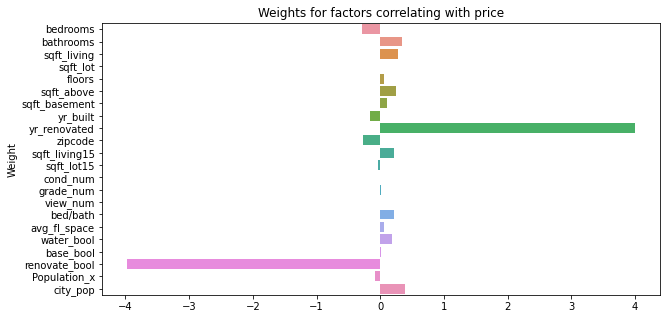

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with price")
plt.ylabel('Weight')
plt.show()

In [75]:
print(results_standardized.rsquared)
results_standardized.summary()

0.6433572838861215


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1320.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:48:03   Log-Likelihood:                -13903.
No. Observations:               15390   AIC:                         2.785e+04
Df Residuals:                   15368   BIC:                         2.802e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.567e-14      0.005  -5.33e-12      1.000      -0.009       0.009
bedrooms         -0.2871      0.011    -26.517      0.000      -0.308      -0.266
bathrooms         0.3360      0.016     21.565      0.000       0.305       0.367
sqft_living       0.2735      0.008     33.032      0.000       0.257       0.290
sqft_lot          0.0021      0.007      0.299      0.765      -0.012       0.016
floors            0.0601      0.014      4.351      0.000       0.033       0.087
sqft_above        0.2484      0.010     24.034      0.000       0.228       0.269
sqft_basement     0.1025      0.009     11.857      0.000       0.086       0.119
yr_built         -0.1681      0.007    -22.943      0.000      -0.182      -0.154
yr_renovated      3.9925      0.611      6.539      0.000       2.796       5.189
zipcode          -0.2778      0.010    -26.870      0.000      -0.298      -0.258
sqft_living15     0.2107      0.008     26.657      0.000       0.195       0.226
sqft_lot15       -0.0397      0.007     -5.646      0.000      -0.053      -0.026
cond_num         -0.0028      0.005     -0.569      0.569      -0.012       0.007
grade_num         0.0054      0.005      1.070      0.285      -0.005       0.015
view_num          0.0002      0.005      0.031      0.975      -0.010       0.010
bed/bath          0.2157      0.012     17.691      0.000       0.192       0.240
avg_fl_space      0.0664      0.014      4.739      0.000       0.039       0.094
water_bool        0.1771      0.005     36.019      0.000       0.167       0.187
base_bool         0.0174      0.009      1.911      0.056      -0.000       0.035
renovate_bool    -3.9702      0.611     -6.502      0.000      -5.167      -2.773
Population_x     -0.0756      0.005    -14.995      0.000      -0.085      -0.066
city_pop          0.3880      0.012     32.776      0.000       0.365       0.411
==============================================================================
Omnibus:                     9916.739   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           459203.371
Skew:                           2.484   Prob(JB):                         0.00
Kurtosis:                      29.295   Cond. No.                     2.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df_zip.drop(columns = ['waterfront','City'], inplace = True)
df_zip_standard = df_zip.apply(lambda x: (x-x.mean())/ x.std())
#X_standard_aug = sm.add_constant(X_standard)
#results_standardized = sm.OLS(y, X_standard_aug).fit()

In [ ]:
LinearRegression()

In [ ]:
lr = LinearRegression()

X = df_zip_standard.drop(columns = ['price'])
y = df_zip_standard['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)
#print(lr.coef_)
#print(X.columns)

print("intercept = ", lr.intercept_)
print('R2 for training = ', lr.score(X_train, y_train))
print('R2 for test = ', lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
MAE = mean_absolute_error(y_pred, y_test)
print("MAE = ", MAE)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE = ",RMSE)

housing company trying to sell cookie cutter homes. 
model most accurate below 2 mil
we can tell them what attributes matter and how to predict value of said homes.